<a href="https://colab.research.google.com/github/cin-fotografia-computacional/02-week/blob/main/Q12_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kevinruiz182/image_processing_tools

Cloning into 'image_processing_tools'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 122 (delta 2), reused 10 (delta 2), pack-reused 108
Receiving objects: 100% (122/122), 46.98 MiB | 20.39 MiB/s, done.
Resolving deltas: 100% (15/15), done.


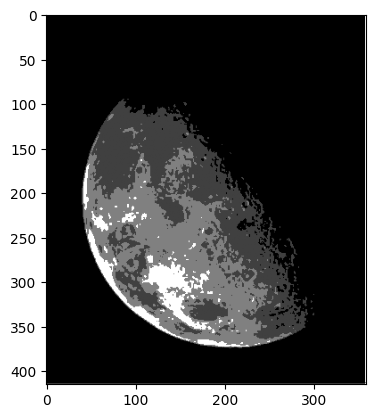

Média dos pixels sobre toda a imagem: 0.13159378460918886


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem original
image_path = '/content/image_processing_tools/images/spatial/moon.jpg'
image = cv2.imread(image_path)

# Somar os 3 canais da imagem original
sum_channels = np.sum(image, axis=2)

# Normalizar o resultado
normalizar = lambda v: (255 * (v - v.min()) / (v.max() - v.min())).astype(int)
normalized_image = normalizar(sum_channels)

# Dividir a saída por 255
normalized_image = normalized_image / 255.0

# Aplicar a limiarização conforme as regras descritas
thresholded_image = np.zeros_like(normalized_image)
thresholded_image[normalized_image < 0.25] = 0
thresholded_image[(normalized_image >= 0.25) & (normalized_image < 0.5)] = 0.25
thresholded_image[(normalized_image >= 0.5) & (normalized_image < 0.75)] = 0.5
thresholded_image[normalized_image >= 0.75] = 1

# Exibir a imagem resultante
plt.imshow(thresholded_image, cmap='gray')
plt.show()

# Calcular a média dos pixels sobre toda a imagem
mean_value = np.mean(thresholded_image)
print(f'Média dos pixels sobre toda a imagem: {mean_value}')
